# 교차표(crosstab)

In [1]:
# 라이브러리
# seaborn 은 heatmap 사용할 때 import 함
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기 1
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [3]:
# 데이터 불러오기 2
stock = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/KOSPI.csv')

# Pandas to_datetime()
stock['Date'] = pd.to_datetime(stock['Date'])
stock['Year'] = stock.Date.dt.year
stock['Month'] = stock.Date.dt.month
stock['Weekday'] = stock.Date.dt.weekday
stock.drop('DataSplit', axis = 1, inplace = True)
stock.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Weekday
0,2014-09-30,2023.18,2029.17,2007.30,2020.09,322812,2014,9,1
1,2014-10-01,2013.47,2013.47,1989.84,1991.54,351581,2014,10,2
2,2014-10-02,1984.43,1985.06,1966.17,1976.16,322656,2014,10,3
3,2014-10-06,1987.89,1988.39,1968.30,1968.39,325078,2014,10,0
4,2014-10-07,1979.83,1982.96,1966.22,1972.91,328234,2014,10,1


In [4]:
# 두 범주별 빈도수 비교
display(pd.crosstab(titanic['Survived'], titanic['Sex']))
display(pd.crosstab(titanic['Survived'], titanic['Embarked']))

Sex,female,male
Survived,,
0,81,468
1,233,109


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


# Crosstab Normalize

In [5]:
# normalize 옵션 columns : 열 기준, index : 행 기준, all : 전체 기준
display(pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns'))
display(pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index'))
display(pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'all'))

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


# pivot & heatmap : 두 범주 집계 시각화

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [7]:
# 데이터 전처리
temp1 = titanic.groupby(['Embarked', 'Pclass'], as_index = False)['PassengerId'].count()
temp1.head(3)

,Embarked,Pclass,PassengerId
0,C,1,85
1,C,2,17
2,C,3,66


In [8]:
# 피봇 테이블
temp2 = temp1.pivot('Embarked', 'Pclass', 'PassengerId')
temp2

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


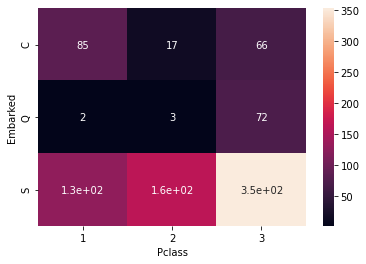

In [9]:
# heatmap
sns.heatmap(temp2, annot = True)
plt.show()

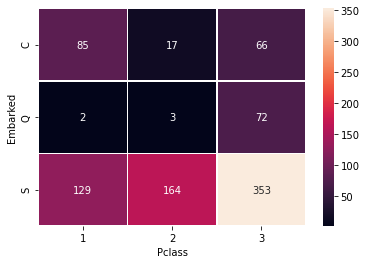

In [10]:
# heatmap 값을 정수로, 구간 간격 설정
sns.heatmap(temp2, annot = True, fmt = 'd', linewidth = .5)
plt.show()

# 시계열 데이터

In [11]:
# 데이터 불러오기 및 전처리
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv', usecols = ['date', 'comp_sales'])
data.loc[data['date'] <= '2015-12-31'].reset_index(drop = True)
data.rename(columns = {'comp_sales' : 'sales'}, inplace = True)
data.head()

,date,sales
0,2013-01-01,43
1,2013-01-02,57
2,2013-01-03,45
3,2013-01-04,45
4,2013-01-05,55


In [12]:
# to_datetime()
data['date'] = pd.to_datetime(data['date'])

In [13]:
# 날짜 요소 뽑기
# 년
data['Year'] = data['date'].dt.year
# 월
data['Month'] = data['date'].dt.month
# 일
data['Month'] = data['date'].dt.day
# 요일 숫자로(0 ~ 6)
data['Weekday'] = data['date'].dt.weekday
# 요일 한글로
data['Day_name'] = data['date'].dt.day_name()

data.head()

,date,sales,Year,Month,Weekday,Day_name
0,2013-01-01,43,2013,1,1,Tuesday
1,2013-01-02,57,2013,2,2,Wednesday
2,2013-01-03,45,2013,3,3,Thursday
3,2013-01-04,45,2013,4,4,Friday
4,2013-01-05,55,2013,5,5,Saturday


# rolling, shift, diff 연습

In [14]:
# shift
data['sales_lag1'] = data['sales'].shift()
data['sales_lag2'] = data['sales'].shift(2)

# rolling, min_periods
data['week_sales'] = data['sales'].rolling(7, min_periods = 1).max()

# diff
data['sales_Inc_lag1'] = data['sales'].diff()
data['sales_Inc_lag2'] = data['sales'].diff(2)

data.head()

,date,sales,Year,Month,Weekday,Day_name,sales_lag1,sales_lag2,week_sales,sales_Inc_lag1,sales_Inc_lag2
0,2013-01-01,43,2013,1,1,Tuesday,NaN,NaN,43.0,NaN,NaN
1,2013-01-02,57,2013,2,2,Wednesday,43.0,NaN,57.0,14.0,NaN
2,2013-01-03,45,2013,3,3,Thursday,57.0,43.0,57.0,-12.0,2.0
3,2013-01-04,45,2013,4,4,Friday,45.0,57.0,57.0,0.0,-12.0
4,2013-01-05,55,2013,5,5,Saturday,45.0,45.0,57.0,10.0,10.0


# 데이터 전처리 process 연습

In [15]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 데이터 불러오기
pop01 = pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv')
pop02 = pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv')
pop03 = pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv')

In [17]:
# 데이터 크기 확인
print(pop01.shape)
print(pop02.shape)
print(pop03.shape)

(40, 3)
(36, 3)
(40, 3)


In [18]:
# year 열 최소값 최대값 확인
print(pop01['year'].min(), pop01['year'].max())
print(pop02['year'].min(), pop02['year'].max())
print(pop03['year'].min(), pop03['year'].max())

1981 2020
1985 2020
1981 2020


In [19]:
# 결측치 확인
print(pop01.isna().sum())
print(pop02.isna().sum())
print(pop03.isna().sum())

year        0
k_male      0
k_female    0
dtype: int64
year        0
f_male      0
f_female    0
dtype: int64
year         0
household    0
older_65     0
dtype: int64


In [20]:
# 열 정보 확인
print(pop01.columns)
print(pop02.columns)
print(pop03.columns)

Index(['year', 'k_male', 'k_female'], dtype='object')
Index(['year', 'f_male', 'f_female'], dtype='object')
Index(['year', 'household', 'older_65'], dtype='object')


In [21]:
# concat은 index 방식으로 이대로 concat 쓰면 어긋남.
# 따라서 merge 사용
data = pd.merge(pop01, pop02, how = 'outer', on = 'year')
data1 = pd.merge(data, pop03, how = 'outer', on = 'year')
data1.head()

,year,k_male,k_female,f_male,f_female,household,older_65
0,1981,4160,4191,NaN,NaN,1915,246
1,1982,4160,4191,NaN,NaN,2001,260
2,1983,4160,4191,NaN,NaN,2116,260
3,1984,4160,4191,NaN,NaN,2246,275
4,1985,4160,4191,7.0,6.0,2338,211


In [22]:
# 결측치 확인
data1.isna().sum()

year         0
k_male       0
k_female     0
f_male       4
f_female     4
household    0
older_65     0
dtype: int64

In [23]:
# 결측치 처리
# 년도에 값이 없는 4 행만 제거
data1.dropna(axis = 0, inplace = True)
data1.head()

,year,k_male,k_female,f_male,f_female,household,older_65
4,1985,4160,4191,7.0,6.0,2338,211
5,1986,4899,4888,7.0,5.0,2428,305
6,1987,5000,4979,6.0,5.0,2518,329
7,1988,5156,5120,5.0,5.0,2658,349
8,1989,5305,5261,6.0,5.0,2817,363


In [24]:
# 열 추가
data1['k_total'] = data1['k_male'] + data1['k_female']
data1['f_total'] = data1['f_male'] + data1['f_female']
data1['male'] = data1['k_male'] + data1['f_male']
data1['female'] = data1['k_female'] + data1['f_female']
data1['total'] = data1['k_total'] + data1['f_total']
data1.head()

,year,k_male,k_female,f_male,f_female,household,older_65,k_total,f_total,male,female,total
4,1985,4160,4191,7.0,6.0,2338,211,8351,13.0,4167.0,4197.0,8364.0
5,1986,4899,4888,7.0,5.0,2428,305,9787,12.0,4906.0,4893.0,9799.0
6,1987,5000,4979,6.0,5.0,2518,329,9979,11.0,5006.0,4984.0,9990.0
7,1988,5156,5120,5.0,5.0,2658,349,10276,10.0,5161.0,5125.0,10286.0
8,1989,5305,5261,6.0,5.0,2817,363,10566,11.0,5311.0,5266.0,10577.0


In [25]:
# 열 순서 변경
data1 = data1[['year', 'household', 'total', 'male', 'female', 'k_total', 'k_male', 'k_female', 'f_total', 'f_male', 'f_female', 'older_65']]
data1.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
4,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
5,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
6,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
7,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
8,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363


In [26]:
# 인덱스 초기화
data1.reset_index(drop = True, inplace = True)
data1.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363
